# Eye Detection Classification Analysis

In [52]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import warnings
import os
import sys
import csv

from collections import defaultdict, Counter
from math import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score

%matplotlib inline

sb.set()
sb.set_style('ticks')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Open Classroom\Datasets\Eye State Classification EEG Dataset\EEG_Eye_State_Classification.csv")
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
df.shape

(14980, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


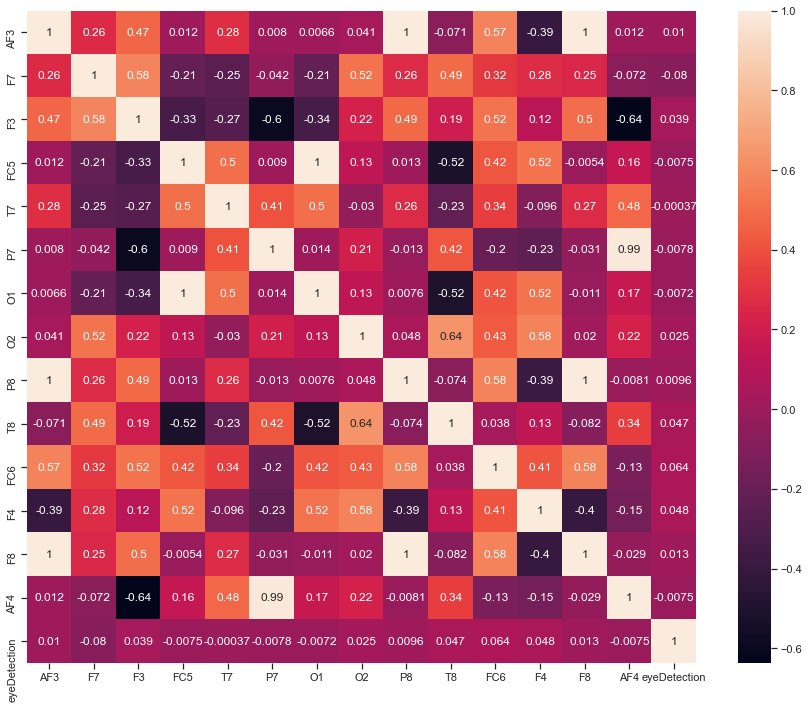

In [11]:
plt.figure(figsize = (15, 12))
sb.heatmap(df.corr(), annot = True)

In [13]:
round(df.describe(), 2)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00,14980.00
mean,4321.92,4009.77,4264.02,4164.95,4341.74,4644.02,4110.40,4616.06,4218.83,4231.32,4202.46,4279.23,4615.21,4416.44,0.45
std,2492.07,45.94,44.43,5216.40,34.74,2924.79,4600.93,29.29,2136.41,38.05,37.79,41.54,1208.37,5891.29,0.50
min,1030.77,2830.77,1040.00,2453.33,2089.74,2768.21,2086.15,4567.18,1357.95,1816.41,3273.33,2257.95,86.67,1366.15,0.00
25%,4280.51,3990.77,4250.26,4108.21,4331.79,4611.79,4057.95,4604.62,4190.77,4220.51,4190.26,4267.69,4590.77,4342.05,0.00
50%,4294.36,4005.64,4262.56,4120.51,4338.97,4617.95,4070.26,4613.33,4199.49,4229.23,4200.51,4276.92,4603.08,4354.87,0.00
75%,4311.79,4023.08,4270.77,4132.31,4347.18,4626.67,4083.59,4624.10,4209.23,4239.49,4211.28,4287.18,4617.44,4372.82,1.00
max,309231.00,7804.62,6880.51,642564.00,6474.36,362564.00,567179.00,7264.10,265641.00,6674.36,6823.08,7002.56,152308.00,715897.00,1.00


In [14]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


### Feature Engineering

### Build and Evaluate Model

#### Train and test dataset

In [28]:
x = df.drop(columns = ['eyeDetection'], axis = 1)
y = df['eyeDetection']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (11984, 14)
x test (2996, 14)
y train (11984,)
y test (2996,)


##### 1. Decision Tree Model

In [29]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_train)
dtc_acc = accuracy_score(dtc_pred, y_train)
print('Predicted Values: ', dtc_pred)
print('Accuracy Score: ', dtc_acc)

Predicted Values:  [0 1 0 ... 0 0 1]
Accuracy Score:  1.0


##### 2. Linear Support Vector Classifier

In [30]:
lsvc = LinearSVC(max_iter=14000)

lsvc.fit(x_train, y_train)

lsvc_pred = lsvc.predict(x_train)
lsvc_acc = accuracy_score(lsvc_pred, y_train)
print('Predicted Values: ', lsvc_pred)
print('Accuracy Score: ', lsvc_acc)

Predicted Values:  [1 1 1 ... 1 0 1]
Accuracy Score:  0.4551902536715621


##### 3. Support Vector Machine Classifier

In [31]:
svc_model = SVC()

svc_model.fit(x_train, y_train)

svc_pred = svc_model.predict(x_train)
svc_acc = accuracy_score(svc_pred, y_train)
print('Predicted Values: ', svc_pred)
print('Accuracy Score: ', svc_acc)

Predicted Values:  [0 0 0 ... 0 0 0]
Accuracy Score:  0.5524032042723631


##### 4. Random Forest Classifier

In [32]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_train)
rfc_acc = accuracy_score(rfc_pred, y_train)
print('Predicted Values: ', rfc_pred)
print('Accuracy Score: ', rfc_acc)

Predicted Values:  [0 1 0 ... 0 0 1]
Accuracy Score:  1.0


#### Compare Models for deployment

In [82]:
def run_experiments(model):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    cmaps = 'Accent', 'Blues', 'viridis', 'cool', 'plasma', 'RdBu'
    
    plot_confusion_matrix(model, x_test, y_test, cmap = 'viridis')
    plt.title('Confusion Matrix for ' + str(model))
    plt.show()

    print(f'Precision : {round(precision_score(y_test, y_pred)*100, 2)}')
    print(f'Recall  : {round(recall_score(y_test, y_pred)*100, 2)}')
    print(f'F1 Score : {round(f1_score(y_test, y_pred)*100, 2)}')
    print(f'Accuracy : {round(accuracy_score(y_test, y_pred)*100, 2)}')

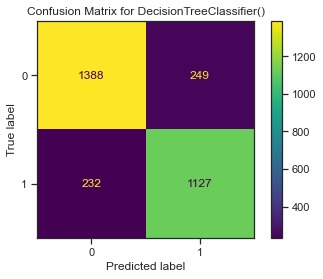

Precision : 81.9
Recall  : 82.93
F1 Score : 82.41
Accuracy : 83.95


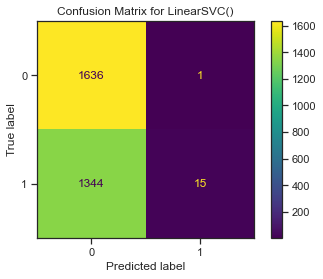

Precision : 93.75
Recall  : 1.1
F1 Score : 2.18
Accuracy : 55.11


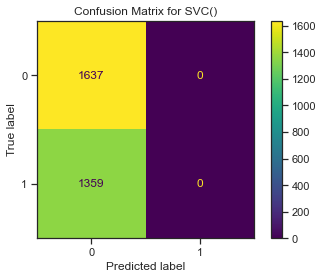

Precision : 0.0
Recall  : 0.0
F1 Score : 0.0
Accuracy : 54.64


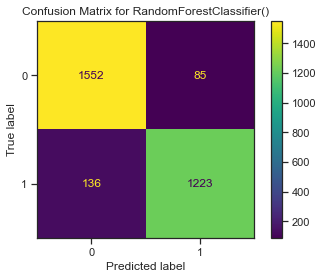

Precision : 93.5
Recall  : 89.99
F1 Score : 91.71
Accuracy : 92.62


In [84]:
dtc = DecisionTreeClassifier()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()

run_experiments(dtc)
run_experiments(lsvc)
run_experiments(svc)
run_experiments(rfc)

#### Manual Testing

In [92]:
rfc_model = RandomForestClassifier()

In [110]:

def Manual_Testing(model, data):
    input_data = data
    
    input_data_to_array = np.asarray(input_data)

    reshape_array = input_data_to_array.reshape(1, -1)

    model.fit(x_train, y_train)
    
    pred = model.predict(reshape_array)
    
    if pred == 0:
        print('Eye working perfectly')
    else:
        print('Eye Detection Found')

In [112]:
data = (4282.05, 3926.15, 4252.31, 4012.82, 4338.46, 4826.15, 4094.36, 4615.9, 4199.49, 2234.87, 4197.95, 4263.08, 4598.97, 4378.41)
Manual_Testing(rfc, data)

Eye Detection Found


In [108]:
df.sample(3).head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
14967,4293.85,4005.13,4262.56,4134.87,4332.82,4614.36,4083.59,4629.23,4204.62,4225.13,4174.87,4276.92,4602.05,4352.31,1
5360,4351.28,3991.28,4285.13,4110.77,4347.69,4634.87,4094.36,4622.05,4213.85,4266.15,4227.18,4303.59,4641.54,4415.38,1
13358,4282.05,4005.64,4266.15,4122.05,4346.67,4618.97,4087.18,4626.67,4202.05,4217.95,4205.13,4279.49,4582.56,4361.54,0
